<a href="https://colab.research.google.com/github/a-brhian/Probabilidade_e_Estatistica/blob/main/Intervalo_de_confian%C3%A7a%2C_correla%C3%A7%C3%A3o_e_regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Intervalo de confiança, correção e regressão

As vezes o pesquisador não fica satisfeito com apenas a estimação de um parâmetro de uma população e deseja saber uma região, onde se possa encontrar determinado parâmetro com um determinado nível de confiança. Nessa situação, existem algumas técnicas estatísticas que permitem ao pesquisar encontrar esse tipo de informação por meio de um **intervalor de confiança**.

Além disso, quando se tem mais de uma variável aleatória, uma pode ser inferida ou explicada em termos da outra. Para isso, podemos usar a **Correlação Linear** para verificar quão associada uma va está de outra e a **Regressão Linear Simples** para escrever uma equação que infira uma va em termos da outra.

In [1]:
#-------------------------------------------
# INSTITUTO FEDERAL DE EDUCACAO, CIENCIA E TECNOLOGIA DO AMAZONAS
#
# CREATED BY: ALYSSON BRHIAN DE SOUZA MUNIZ SILVA
# DATA: 09/06/2025
# VERSION OF R: 4.5.0
#
# GOAL: Capítulo 6 do Devore
#rm(list=ls());gc();setwd(path_name);save.image("???.RData")
#---------------------------------------------
R.version.string

[1] "R version 4.5.0 (2025-04-11)"

## Banco de dados

Usaremos o mesmo banco de dados utilizados na aula anterior sobre **Estimadores**, disponível no seguinte link:

https://www.kaggle.com/datasets/adilshamim8/social-media-addiction-vs-relationships?resource=download

In [2]:
dados <- read.csv("/content/students_social_media_addiction.csv",header=T)

#head(dados)
#tail(dados)
dim(dados)

dados.f <- dados[dados$Academic_Level == "Undergraduate" & dados$Most_Used_Platform == "Instagram",]
head(dados.f)
dim(dados.f)

attach(dados.f)

[1] 705  13

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>,<chr>,<int>,<int>
1,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
6,6,19,Female,Undergraduate,Australia,7.2,Instagram,Yes,4.5,4,Complicated,5,9
23,23,19,Male,Undergraduate,Austria,4.9,Instagram,Yes,5.8,6,Complicated,3,7
35,35,19,Male,Undergraduate,Hong Kong,4.7,Instagram,Yes,5.8,6,In Relationship,3,7
47,47,19,Male,Undergraduate,Colombia,4.8,Instagram,Yes,5.9,6,In Relationship,3,7
59,59,19,Male,Undergraduate,Iceland,4.6,Instagram,Yes,5.9,6,Complicated,3,7


[1] 155  13

#Estimação Intervalar
### Determinação da média com desvio padrão CONHECIDO

Suponha que a va `Sleep_Hours_Per_Night` tenha uma distribuição normal com $\sigma=1.2$ e desejamos saber qual o valor da média populacional com um nível de confiança de $95\%$:

$$\left(\bar{X}\pm z_{95\%}\frac{\sigma}{\sqrt{n}}\right)$$

O valor de $z_{95\%}$ para intervalo bicaudal pode ser calculado por meio da seguinte função:

In [3]:
z <- qnorm(1-(1-.95)/2); z

[1] 1.959964

Dessa forma o erro pode ser calculado como:

In [4]:
error <- z*1.2/sqrt(dim(dados.f)[1]); round(error,2)

[1] 0.19

Dessa forma, o intervalo de confiança para $\bar{X}$ com $95\%$ de confiança será:

In [5]:
cat("(",mean(Sleep_Hours_Per_Night)-error,";",mean(Sleep_Hours_Per_Night)+error,")")

( 6.90528 ; 7.283107 )

Esse intervalo significa que com um nível de confiança de $95\%$ eu encontrarei a média da `Sleep_Hours_Per_Night`.

É importante lembrar que dependendo da necessidade, e em geral, pede-se intervalos de confiança com $90$, $95$ ou $99\%$.

### Determinação da média com desvio padrão DESCONHECIDO

Se a amostra que temos acesso tem um desvio padrão desconhecido, ou a amostra é tão grande que podemos aplicar o Teorema do Limite Central (TLC), então podemos estimar o intervalo de confiança por meio da seguinte equação:

$$\left(\bar{X}\pm z_{95\%}\frac{s}{\sqrt{n}}\right),$$

onde $s$ é o desvio padrão amostral.

In [6]:
sd(Sleep_Hours_Per_Night)

error <- z*sd(Sleep_Hours_Per_Night)/sqrt(dim(dados.f)[1]); round(error,2)

cat("(",mean(Sleep_Hours_Per_Night)-error,";",mean(Sleep_Hours_Per_Night)+error,")")

[1] 1.29636

[1] 0.2

( 6.89011 ; 7.298277 )

### Determinação da proporção

Podemos estimar o intervalo de confiança para a proporção por meio da seguinte equação:

$$\left(\frac{\hat{p}+\frac{z_{95\%}^2}{2n}\pm z_{95\%} \sqrt{\frac{\hat{p}\hat{q}}{n}+\frac{z_{95\%}^2}{4n^2}}}{1+\frac{z_{95\%}^2}{n}}\right),$$

onde $\hat{q}=1-\hat{p}$.


Vamos estimar a proporção de homens nesta população:

In [7]:
p <- table(Gender)[2]/sum(table(Gender)); p

n <- dim(dados.f)[1]; n

Male 
0.09677419

[1] 155


No R podemos fazer os seguinte código para estimar a proporção de homens nessa população:

In [8]:
cat("(",(p+z^2/(2*n)-z*sqrt((p*(1-p))/n+z^2/(4*n^2)))/(1+z^2/n),";",(p+z^2/(2*n)+z*sqrt((p*(1-p))/n+z^2/(4*n^2)))/(1+z^2/n),")")

( 0.05952575 ; 0.1535261 )

### Determinação da média com desvio padrão DESCONHECIDO - pequenas amostras

Se a amostra é oriunda de uma distribuição normal e pequena, então os valores críticos não serão oriundos de uma normal padrão, mas sim de uma distribuição *t-student* com $\nu-1$ graus de liberdade (gl).

Nesse caso, o intervalo de confiança é calculado como:

$$\left(\bar{X}\pm t_{95\%,\nu-1}\frac{s}{\sqrt{n}}\right).$$

O valor de  $t_{95\%,\nu-1}$  para intervalo bicaudal pode ser calculado por meio da seguinte função:

In [9]:
nn <- 10

gl <- nn-1; gl

tc <- qt(1-(1-.95)/2,gl); tc

[1] 9

[1] 2.262157

Vamos separar aleatoriamente um subconjunto com $nn=10$ da va `Sleep_Hours_Per_Night`:

In [10]:
set.seed(2025)

ind <- sample(1:dim(dados.f[1]),10); ind

Warning message in 1:dim(dados.f[1]):
“numerical expression has 2 elements: only the first used”


[1] 141 154  23  10 113 132  27 123 117  59

Dessa forma o erro pode ser calculado como:

In [11]:
error <- tc*sd(Sleep_Hours_Per_Night[ind])/sqrt(nn); error

[1] 0.9334425

Dessa forma, o intervalo de confiança para a média populacional será:

In [12]:
cat("(",mean(Sleep_Hours_Per_Night[ind])-error,";",mean(Sleep_Hours_Per_Night[ind])+error,")")

( 5.206557 ; 7.073443 )

### Determinação da variância

O intervalo de confiança para a variância de uma população por ser estimado por meio da seguinte expressão:

$$\left( \frac{(n-1)s^2}{\chi^2_{(100-95)/2\%,n-1}};
\frac{(n-1)s^2}{\chi^2_{100-(100-95)/2\%,n-1}}\right),$$

onde $\chi^2$ é a distribuição Qui-Quadrada com $n-1$ graus de liberdade (gl).

Vamos estimar os quantis para a distribuição Qui-Quadrada com $gl = n-1$ para a variável `Sleep_Hours_Per_Night`:

In [13]:
gl <- length(Sleep_Hours_Per_Night)-1; gl

q_inf <- qchisq((1-.95)/2, gl); q_inf
q_sup <- qchisq(1-(1-.95)/2, gl); q_sup

[1] 154

[1] 121.5344

[1] 190.2507

Dessa forma, o intervalo da variância é estimado como:

In [15]:
LI <- (n-1)*sd(Sleep_Hours_Per_Night)^2/q_inf^2
LS <- (n-1)*sd(Sleep_Hours_Per_Night)^2/q_sup^2

cat("(",LI,";",LS,")")

( 0.01752161 ; 0.007150228 )

# Correlação

A correlação linear, ou correlação de Pearson, serve para mostrar quão associadas linearmente duas variáveis estão entre si.

Essa correlação pode ser calculada por meio da seguinte expressão:

$$r=\frac{S_{xy}}{\sqrt{\sum_{i=1}^n(x_i-\bar{x})^2(y_i-\bar{y})^2}},$$

onde $S_{xy}=\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})$.

Considere que desejamos estudar a correlação linear entre as variáveis `Avg_Daily_Usage_Hours` e `Sleep_Hours_Per_Night`.

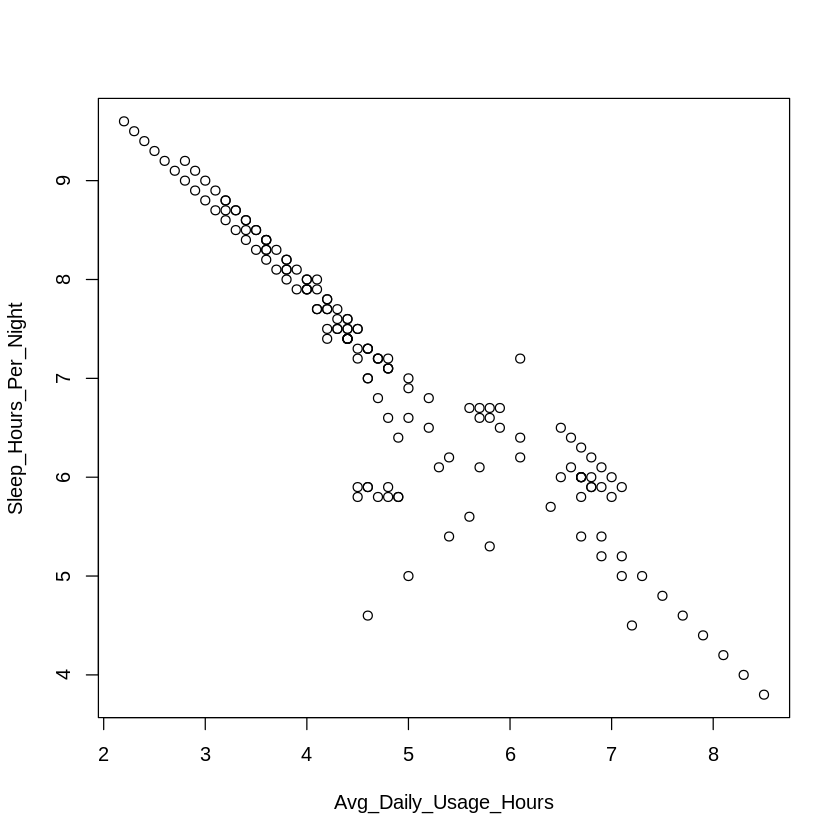

In [ ]:
plot(Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night)

Nota-se no gráfico que quanto mais tempo se passa no *Instagram*, quando se está na pós-graduação, menos tempo a pessoa consegue dormir.

Se desejamos saber quão correlacionadas linearmente essas duas variáveis estão, basta usarmos o seguinte código:

In [ ]:
cor(Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night)

[1] -0.9078014

#Regressão linear

Depois de encontrarmos que determinadas variáveis tem uma alta correlação linear, podemos ajustar uma reta de regressão linear.

A regressão linear, é o ajuste de uma reta que minimiza a distância entre os valores reais com os valores estimados por uma reta. A reta de regressão linear é expressa por:

$$Y=\beta_0+\beta_1x+\epsilon$$

No R, podemos calcular os valores de $\beta$, por meio da seguinte função:

In [16]:
modelo <- lm(Sleep_Hours_Per_Night ~ Avg_Daily_Usage_Hours); summary(modelo)


Call:
lm(formula = Sleep_Hours_Per_Night ~ Avg_Daily_Usage_Hours)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.68909 -0.06426  0.11228  0.29242  1.15920 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           11.11717    0.15652   71.03   <2e-16 ***
Avg_Daily_Usage_Hours -0.83219    0.03108  -26.77   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5455 on 153 degrees of freedom
Multiple R-squared:  0.8241,	Adjusted R-squared:  0.823 
F-statistic: 716.8 on 1 and 153 DF,  p-value: < 2.2e-16


A reta da regressão linear fica ajustada da seguinte forma:

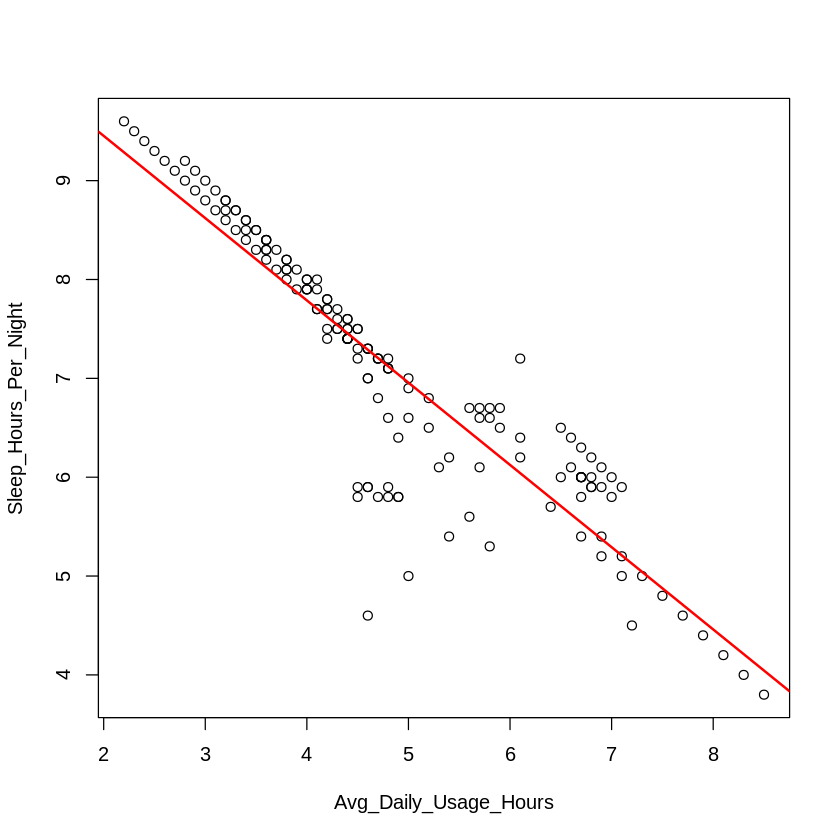

In [17]:
plot(Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night)

abline(a=modelo[1],b=modelo[2],col="red",lwd=2)

Logo, a regressão linear me informa que uma pessoa que está na pós-graduação, quando não usa celular dorme em média $11.1$ h por noite. Além disso, para cada $1$ h de uso do *Instagram*, a pessoa dorme $-0.8$ h por noite.

Vamos estimar, quantos minutos equivalem a $0.8$ horas:

In [18]:
0.8*60

[1] 48

Logo, cada hora de uso do *Instagram* diminui $48$ min de tempo de sono.